In [1]:
import pandas as pd 
import numpy as np 
from scipy.optimize import root 
import matplotlib.pyplot as plt 

from grid_model import GridModel, ORPDHandler #, GridDataClass
from grid_data_class import FileType, GridDataClass
import import_grid_model

In [2]:
bus_data, branch_data = import_grid_model.get_item_dict("grid_model_data//IEEE 30-bus RAW.txt")

In [3]:
bus_data

{'bus_num': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 'name': array(['Glen Lyn 132', 'Claytor  132', 'Kumis    132', 'Hancock  132',
        'Fieldale 132', 'Roanoke  132', 'Blaine   132', 'Reusens  132',
        'Roanoke  1.0', 'Roanoke   33', 'Roanoke   11', 'Hancock   33',
        'Hancock   11', 'Bus 14    33', 'Bus 15    33', 'Bus 16    33',
        'Bus 17    33', 'Bus 18    33', 'Bus 19    33', 'Bus 20    33',
        'Bus 21    33', 'Bus 22    33', 'Bus 23    33', 'Bus 24    33',
        'Bus 25    33', 'Bus 26    33', 'Cloverdle 33', 'Cloverdle132',
        'Bus 29    33', 'Bus 30    33'], dtype='<U12'),
 'area': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]),
 'loss_zone': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]),
 'type': array([3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 

In [9]:
branch_data

{'tap_bus': array([ 1,  1,  2,  3,  2,  2,  4,  5,  6,  6,  6,  6,  9,  9,  4, 12, 12,
        12, 12, 14, 16, 15, 18, 19, 10, 10, 10, 10, 21, 15, 22, 23, 24, 25,
        25, 28, 27, 27, 29,  8,  6]),
 'Z_bus': array([ 2,  3,  4,  4,  5,  6,  6,  7,  7,  8,  9, 10, 11, 10, 12, 13, 14,
        15, 16, 15, 17, 18, 19, 20, 20, 17, 21, 22, 22, 23, 24, 24, 25, 26,
        27, 27, 29, 30, 30, 28, 28]),
 'area': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'loss_zone': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'circuit': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'type': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [2]:
grid_data = GridDataClass("grid_model_data//OPF_grid2.xlsx", FileType.Excel, f_nom=50)
grid_model = GridModel(grid_data) 
grid_data._grid_gens

KeyError: 'v_base_kV'

In [3]:
sol = grid_model.powerflow()
sol

P_calc = [  0.99 -20.    20.    20.   -20.  ] MW 
Q_calc = [ 19.685 -10.    -14.678  11.817 -10.   ] Mvar 
V_buses = [1.02   0.9606 1.     1.     0.9574] pu 
d_buses = [ 0.     -2.4668  1.7743  1.1426 -2.8406] deg 

In [4]:
ORPF_model = ORPDHandler(grid_model, np.array([1, 2]))
sol = ORPF_model.solve_ORPD()
sol 

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8576798644073058
       x: [ 1.030e+00  1.029e+00]
     nit: 4
     jac: [-1.834e-02 -1.707e-03]
    nfev: 16
    njev: 4

In [7]:
sol.x 

array([1.03007808, 1.02935903])

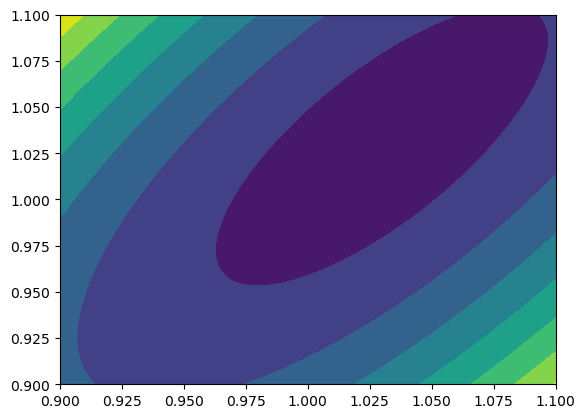

In [9]:
V1_vals = np.linspace(0.9, 1.1, 100)
V2_vals = np.linspace(0.9, 1.1, 100)
V1_mesh, V2_mesh = np.meshgrid(V1_vals, V2_vals)

P_loss = np.zeros((100, 100))
func = ORPF_model.get_ORPD_func()

for j, V1 in enumerate(V1_vals): 
    for i, V2 in enumerate(V2_vals): 
        ORPF_model.get_ORPD_func()
        P_loss[i, j] = func(np.array([V1, V2]))
        
plt.contourf(V1_mesh, V2_mesh, P_loss) 


In [14]:
N_1 = 20 
N_2 = 20
P_load_1 = np.linspace(0.0, 30.0, N_1)
P_load_2 = np.linspace(0.0, 30.0, N_2)
P1_mesh, P2_mesh = np.meshgrid(P_load_1, P_load_2)
grid_data.change_Q_load([0, 1], [0, 0])

P_loss = np.zeros((N_1, N_2))
V1_opt = np.zeros((N_1, N_2))
V2_opt = np.zeros((N_1, N_2))

for j, P1 in enumerate(P_load_1): 
    for i, P2 in enumerate(P_load_2): 
        grid_data.change_P_load([0, 1], [P1, P2])
        sol = ORPF_model.solve_ORPD()
        P_loss[i, j] = sol.fun 
        V1_opt[i, j] = sol.x[0]
        V2_opt[i, j] = sol.x[1]        

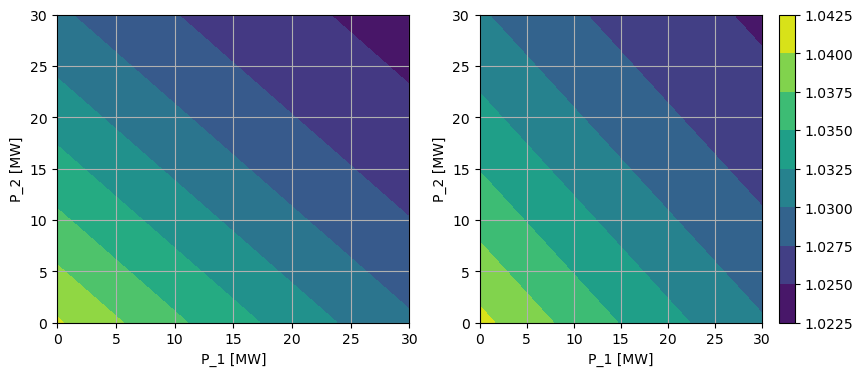

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
CS = ax[0].contourf(P1_mesh, P2_mesh, V1_opt) 
CS = ax[1].contourf(P1_mesh, P2_mesh, V2_opt) 
cbar = fig.colorbar(CS)

ax[0].set_xlabel("P_1 [MW]")
ax[0].set_ylabel("P_2 [MW]")
ax[0].grid()
ax[1].set_xlabel("P_1 [MW]")
ax[1].set_ylabel("P_2 [MW]")
ax[1].grid()
plt.show() 

In [5]:
from mealpy.swarm_based import PSO

func = ORPF_model.get_ORPD_func()
problem_dict = ORPF_model.get_problem_dict()

# ga_model = GA.BaseGA(epoch=50, pop_size=100, pc=0.85, pm=0.1)
ga_model = PSO.OriginalPSO(epoch=50, pop_size=500)
best_position, best_fitness_value = ga_model.solve(problem_dict, mode="single", n_workers=8)

print(best_position)
print(best_fitness_value)

2023/03/06 12:07:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2023/03/06 12:07:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 1, Current best: 0.8582742459566752, Global best: 0.8582742459566752, Runtime: 0.35898 seconds
2023/03/06 12:08:00 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 2, Current best: 0.8582742459566752, Global best: 0.8582742459566752, Runtime: 0.41387 seconds
2023/03/06 12:08:00 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 3, Current best: 0.8582742459566752, Global best: 0.8582742459566752, Runtime: 0.35962 seconds
2023/03/06 12:08:00 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 4, Current best: 0.8582742459566752, Global best: 0.8582742459566752, Runtime: 0.36283 seconds
2023/03/06 12:08:01 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 5, Current best: 0.8582742459566752, Global best: 0.8582742459566752, Runtime

[1.03007426 1.02936883]
0.8576799099874322


In [12]:
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8576798644073058
       x: [ 1.030e+00  1.029e+00]
     nit: 4
     jac: [-1.834e-02 -1.707e-03]
    nfev: 16
    njev: 4

In [1]:
from import_grid_model import get_item_dict 
bus_data, branch_data = get_item_dict(filename="grid_model_data//IEEE 30-bus RAW.txt")

In [2]:
bus_data[0]

{'bus_num': 1,
 'name': 'Glen Lyn 132',
 'area': 1,
 'loss_zone': 1,
 'type': 3,
 'final_v': 1.06,
 'final_delta': 0.0,
 'load_mw': 0.0,
 'load_mvar': 0.0,
 'gen_mw': 260.2,
 'gen_mvar': -16.1,
 'base_kV': 132.0,
 'v_desire': 0.06,
 'q_max': 0.0,
 'q_min': 0.0,
 'shunt_g_pu': 0.0,
 'shunt_b_pu': 0.0,
 'remote_bus': 0}

In [166]:
bus_locs = {"bus_num": (1, 5), "name": (5, 19), "area": (19, 21), "loss_zone": (21, 24), "type": (25, 27), 
            "final_v": (27, 33), "final_delta": (34, 41), "load_mw": (41, 50), "load_mvar": (50, 60), "gen_mw": (60, 68), "gen_mvar": (68, 75), 
            "base_kV": (77, 84), "v_desire": (85, 91), "q_max": (91, 99), "q_min": (99, 106), "shunt_g_pu": (107, 115), "shunt_b_pu": (115, 123), 
            "remote_bus": (124, 128)}
bus_types = {"bus_num": int, "name": str, "area": int, "loss_zone": int, "type": int, 
            "final_v": float, "final_delta": float, "load_mw": float, "load_mvar": float, "gen_mw": float, "gen_mvar": float, 
            "base_kV": float, "v_desire": float, "q_max": float, "q_min": float, "shunt_g_pu": float, "shunt_b_pu": float, 
            "remote_bus": int}

branch_locs = {"tap_bus": (1, 5), "Z_bus": (6,9), "area": (10, 13), "loss_zone": (13, 15), "circuit": (16, 18), "type": (18, 21), 
               "r_pu": (20, 29), "x_pu": (30, 40), "b_pu": (41, 50), "line_MVA_1": (51, 55), "line_MVA_2": (57, 61), "line_MVA_3": (63, 67), 
               "control_bus": (69, 72), "side": (73, 75), "tap_ratio_final": (77, 82), "phase_shift": (84, 90), "tap_min": (90, 97), "tap_max": (98, 104), 
               "step_size": (106, 111), "min_V/MVA": (112, 117), "max_V/MVA": (119, 125)}
branch_types = {"tap_bus": int, "Z_bus": int, "area": int, "loss_zone": int, "circuit": int, "type": int, 
               "r_pu": float, "x_pu": float, "b_pu": float, "line_MVA_1": float, "line_MVA_2": float, "line_MVA_3": float, 
               "control_bus": int, "side": int, "tap_ratio_final": float, "phase_shift": float, "tap_min": float, "tap_max": float, 
               "step_size": float, "min_V/MVA": float, "max_V/MVA": float}

def get_vals(data_row, data_locs, data_types): 
    data = {}
    for (name, val), (_, dtype) in zip(data_locs.items(), data_types.items()): 
        # print(val, name) 
        str_val = dtype(data_row[val[0] : val[1]].strip())
        print(str_val, name)
        data[name] = str_val
    return data



In [167]:

idx_bus_start = 2
with open("grid_model_data//IEEE 30-bus RAW.txt") as f: 
    lines = [line.rstrip() for line in f]

date_line = lines[0]
bus_data_info = lines[1]
N_buses = int(bus_data_info[-14:].strip()[:-6]) # Experimental 

bus_data = []
for i, line in enumerate(lines[2:N_buses+2]):
    bus_data.append(get_vals(line, bus_locs, bus_types))

idx = N_buses + 2 + 1 
branch_data_info = lines[idx]
N_branches = int(branch_data_info[-14:].strip()[:-6]) # Experimental 

branch_data = []
for i, branch in enumerate(lines[idx+1 : idx+1+N_branches]):
    branch_data.append(get_vals(branch, branch_locs, branch_types))


1 bus_num
Glen Lyn 132 name
1 area
1 loss_zone
3 type
1.06 final_v
0.0 final_delta
0.0 load_mw
0.0 load_mvar
260.2 gen_mw
-16.1 gen_mvar
132.0 base_kV
0.06 v_desire
0.0 q_max
0.0 q_min
0.0 shunt_g_pu
0.0 shunt_b_pu
0 remote_bus
2 bus_num
Claytor  132 name
1 area
1 loss_zone
2 type
1.043 final_v
-5.48 final_delta
21.7 load_mw
12.7 load_mvar
40.0 gen_mw
50.0 gen_mvar
132.0 base_kV
0.045 v_desire
50.0 q_max
-40.0 q_min
0.0 shunt_g_pu
0.0 shunt_b_pu
0 remote_bus
3 bus_num
Kumis    132 name
1 area
1 loss_zone
0 type
1.021 final_v
-7.96 final_delta
2.4 load_mw
1.2 load_mvar
0.0 gen_mw
0.0 gen_mvar
132.0 base_kV
0.0 v_desire
0.0 q_max
0.0 q_min
0.0 shunt_g_pu
0.0 shunt_b_pu
0 remote_bus
4 bus_num
Hancock  132 name
1 area
1 loss_zone
0 type
1.012 final_v
-9.62 final_delta
7.6 load_mw
1.6 load_mvar
0.0 gen_mw
0.0 gen_mvar
132.0 base_kV
0.0 v_desire
0.0 q_max
0.0 q_min
0.0 shunt_g_pu
0.0 shunt_b_pu
0 remote_bus
5 bus_num
Fieldale 132 name
1 area
1 loss_zone
2 type
1.01 final_v
14.37 final_delta


In [169]:
branch_data[-6]

{'tap_bus': 28,
 'Z_bus': 27,
 'area': 1,
 'loss_zone': 1,
 'circuit': 1,
 'type': 0,
 'r_pu': 0.0,
 'x_pu': 0.396,
 'b_pu': 0.0,
 'line_MVA_1': 0.0,
 'line_MVA_2': 0.0,
 'line_MVA_3': 0.0,
 'control_bus': 0,
 'side': 0,
 'tap_ratio_final': 0.968,
 'phase_shift': 0.0,
 'tap_min': 0.0,
 'tap_max': 0.0,
 'step_size': 0.0,
 'min_V/MVA': 0.0,
 'max_V/MVA': 0.0}

In [115]:
lines 

[' 08/20/93 UW ARCHIVE           100.0  1961 W IEEE 30 Bus Test Case',
 'BUS DATA FOLLOWS                            30 ITEMS',
 '   1 Glen Lyn 132  1  1  3 1.060    0.0      0.0      0.0    260.2   -16.1   132.0  1.060     0.0     0.0   0.0    0.0        0',
 '   2 Claytor  132  1  1  2 1.043  -5.48     21.7     12.7     40.0    50.0   132.0  1.045    50.0   -40.0   0.0    0.0        0',
 '   3 Kumis    132  1  1  0 1.021  -7.96      2.4      1.2      0.0     0.0   132.0  0.0       0.0     0.0   0.0    0.0        0',
 '   4 Hancock  132  1  1  0 1.012  -9.62      7.6      1.6      0.0     0.0   132.0  0.0       0.0     0.0   0.0    0.0        0',
 '   5 Fieldale 132  1  1  2 1.010 -14.37     94.2     19.0      0.0    37.0   132.0  1.010    40.0   -40.0   0.0    0.0        0',
 '   6 Roanoke  132  1  1  0 1.010 -11.34      0.0      0.0      0.0     0.0   132.0  0.0       0.0     0.0   0.0    0.0        0',
 '   7 Blaine   132  1  1  0 1.002 -13.12     22.8     10.9      0.0     0.0   1

In [66]:
val[1]

128

In [79]:
"hello lolo lo       ".strip()

'hello lolo lo'